In [5]:
import pandas as pd

df = pd.read_csv("C:\\Users\\sergi\\Proyectos\\Proyecto_Final\\data\\processed\\vehicles_clean_fact.csv", quotechar='"')

df = df.drop(columns = ["lat", "long"])

df

,price,year,manufacturer,model,fuel,odometer,transmission,drive,size,type,state
0,22590,2010.0,0,0,0,71229.0,0,0,0,0,0
1,30990,2017.0,1,1,0,41124.0,0,0,0,0,0
2,15000,2013.0,2,2,0,128000.0,1,1,0,1,0
3,35000,2019.0,1,3,0,43000.0,1,0,1,1,0
4,29990,2016.0,0,4,0,17302.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
301056,29590,2016.0,1,164,0,53475.0,1,0,0,3,50
301057,0,2010.0,1,158,0,155000.0,1,0,1,11,50
301058,32590,2020.0,11,455,0,19059.0,0,1,2,6,50
301059,33590,2018.0,18,1659,0,30814.0,1,1,1,6,50


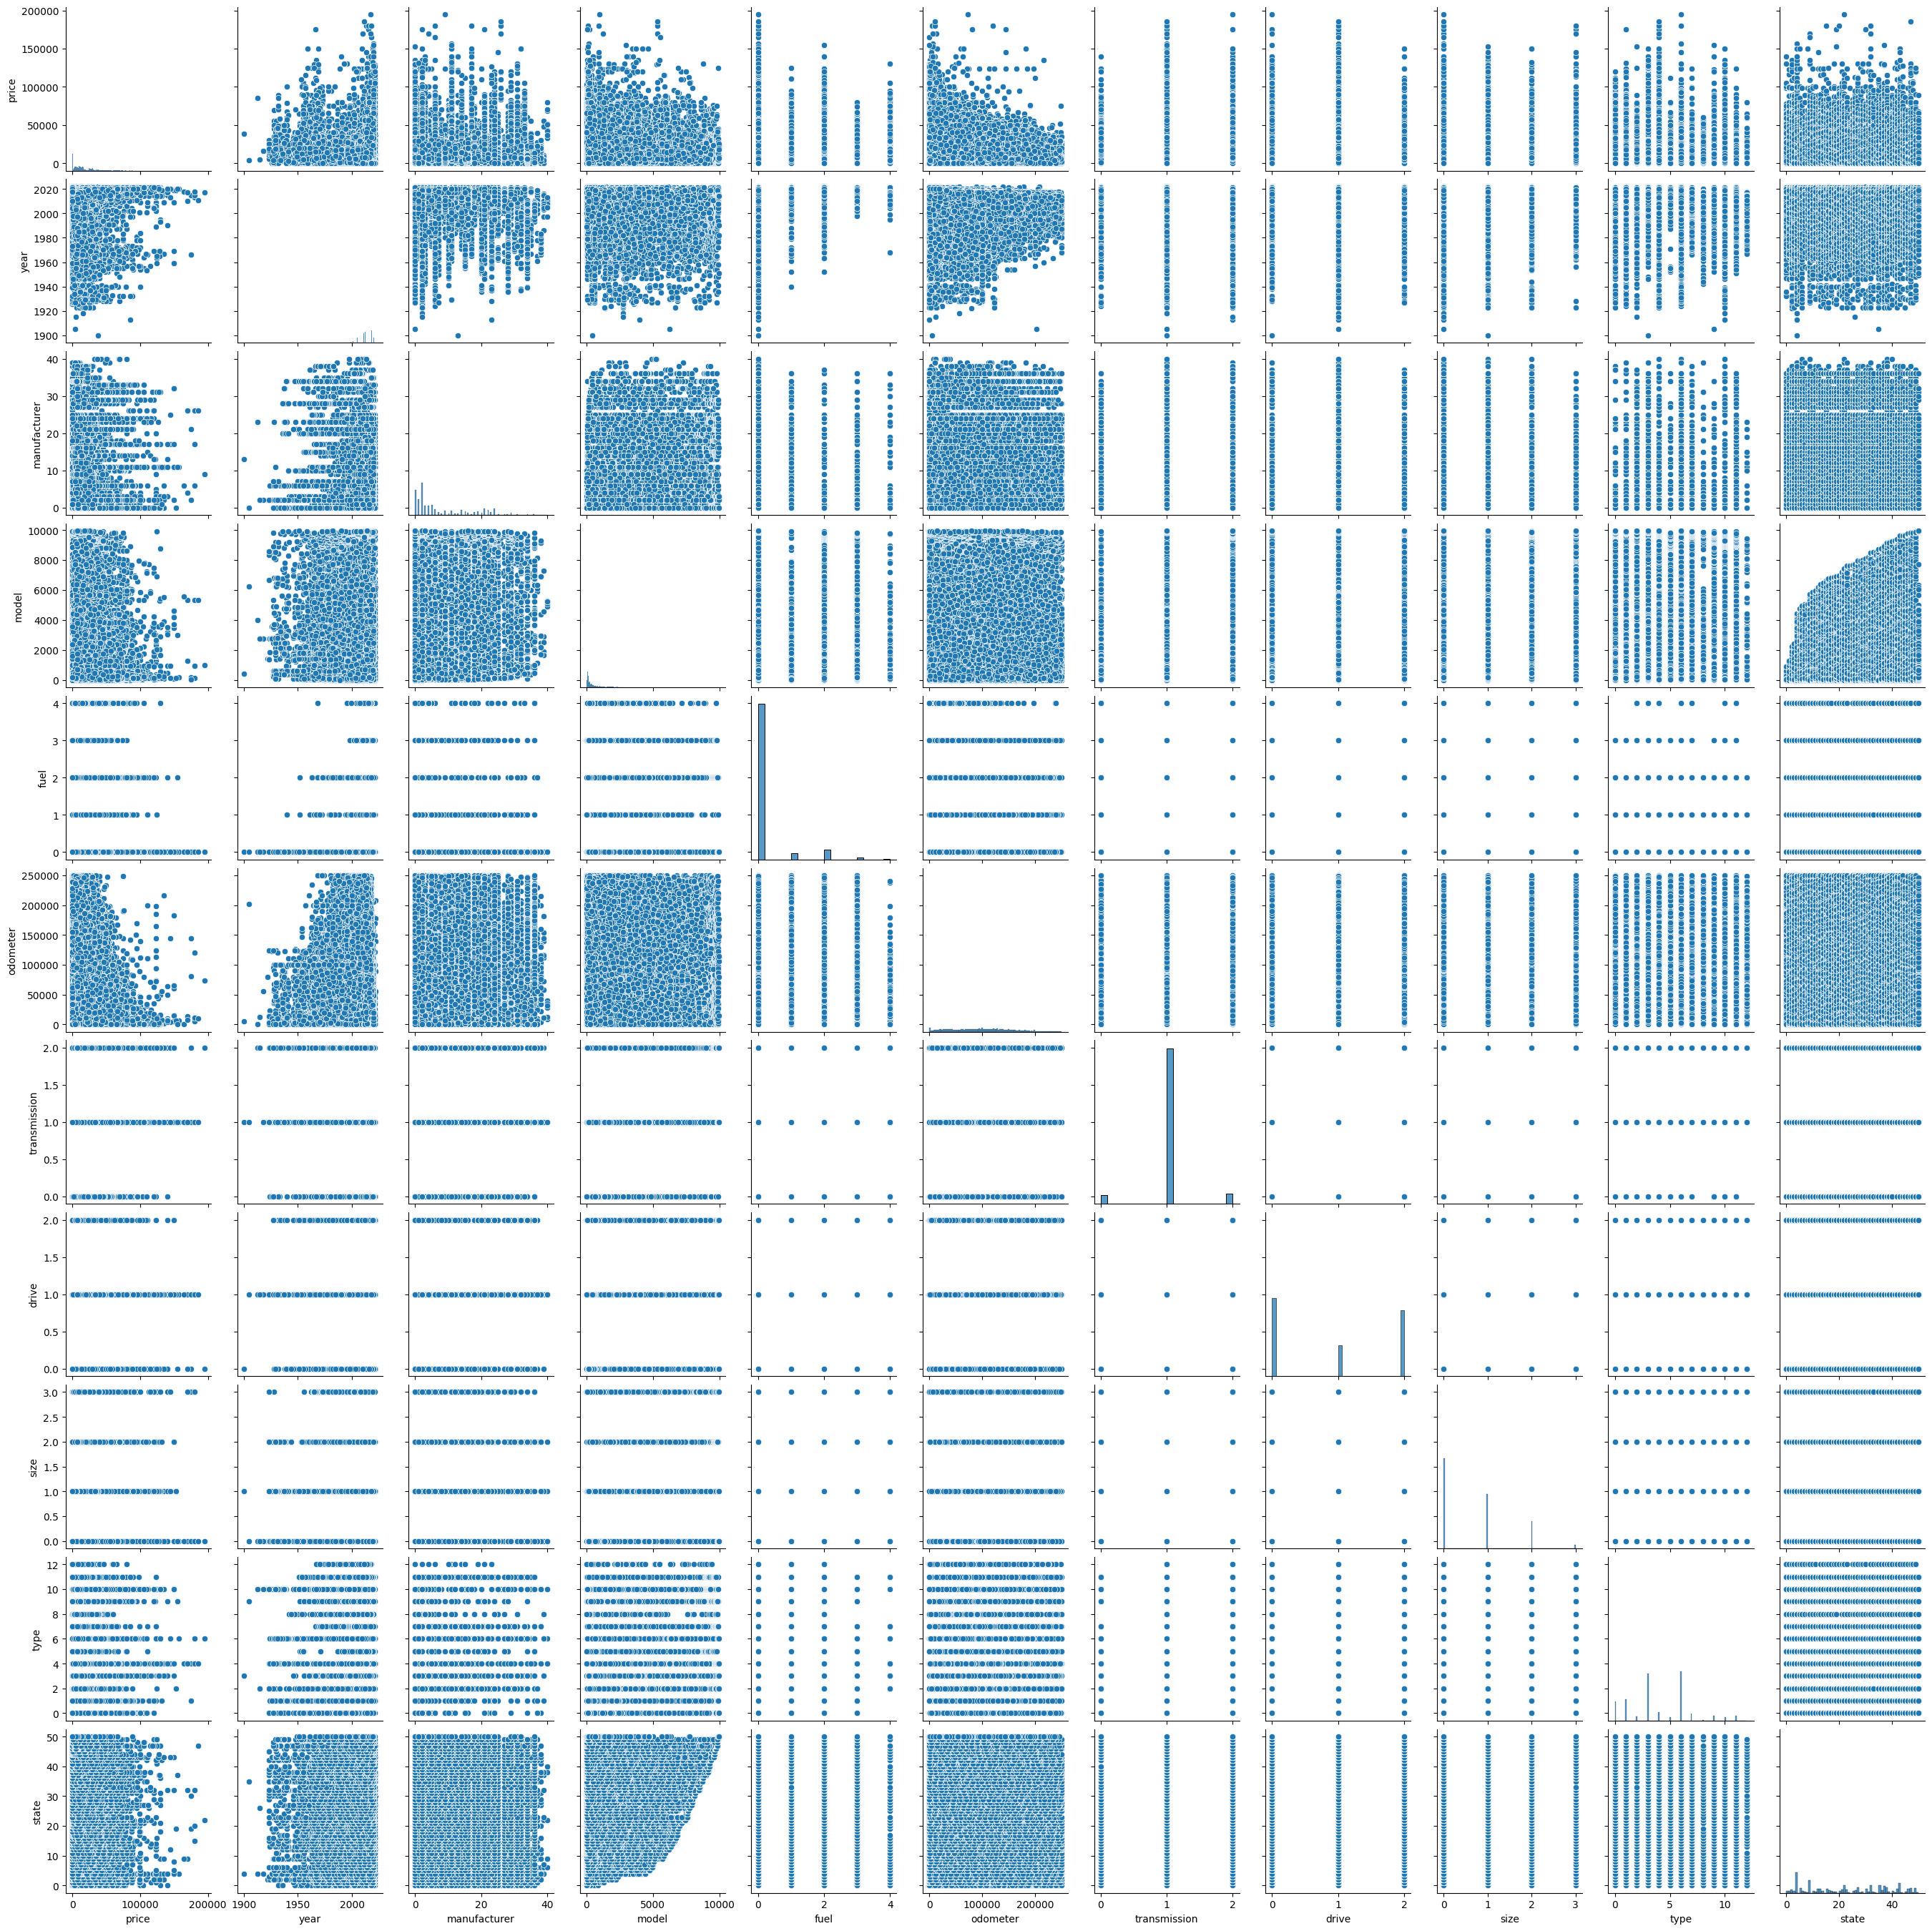

In [6]:
import seaborn as sns

sns.pairplot(data=df)

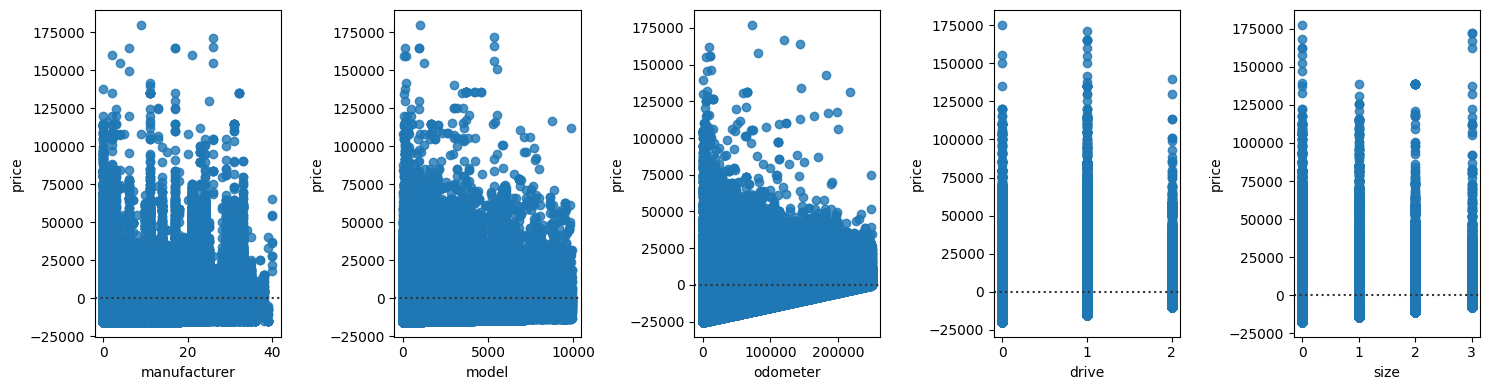

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

sns.residplot(x='manufacturer', y='price', data=df, ax = axes[0])
sns.residplot(x='model', y='price', data=df, ax = axes[1])
sns.residplot(x='odometer', y='price', data=df, ax = axes[2])
sns.residplot(x='drive', y='price', data=df, ax = axes[3])
sns.residplot(x='size', y='price', data=df, ax = axes[4])

plt.tight_layout()
plt.show()

c:\Users\sergi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 301061.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for price: Statistics=0.8618897596731266, p-value=5.67956535720507e-145
Shapiro-Wilk test for year: Statistics=0.7301160168457725, p-value=6.875046085827314e-167
Shapiro-Wilk test for manufacturer: Statistics=0.8255806427207278, p-value=1.9748356614875796e-152
Shapiro-Wilk test for model: Statistics=0.6218421796381576, p-value=1.6251518351767406e-178
Shapiro-Wilk test for fuel: Statistics=0.36017081111997684, p-value=1.9740123728071314e-197
Shapiro-Wilk test for odometer: Statistics=0.9799826936730048, p-value=1.603304329813791e-90
Shapiro-Wilk test for transmission: Statistics=0.45117537114345774, p-value=8.187688277535712e-192
Shapiro-Wilk test for drive: Statistics=0.7333135359881373, p-value=1.7411237509040064e-166
Shapiro-Wilk test for size: Statistics=0.7668642276711496, p-value=5.742401784272403e-162
Shapiro-Wilk test for type: Statistics=0.9228402145951615, p-value=3.4068238464325244e-127
Shapiro-Wilk test for state: Statistics=0.9268901748248364, p-value=1.31

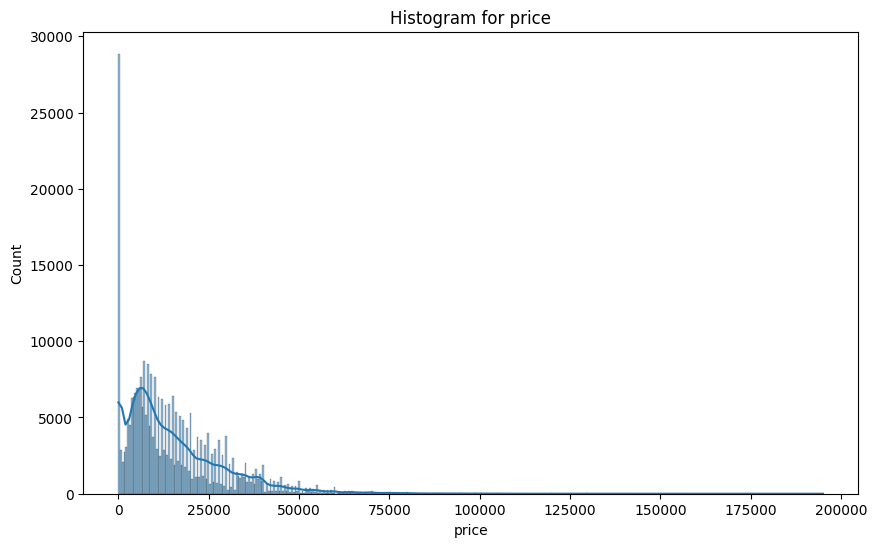

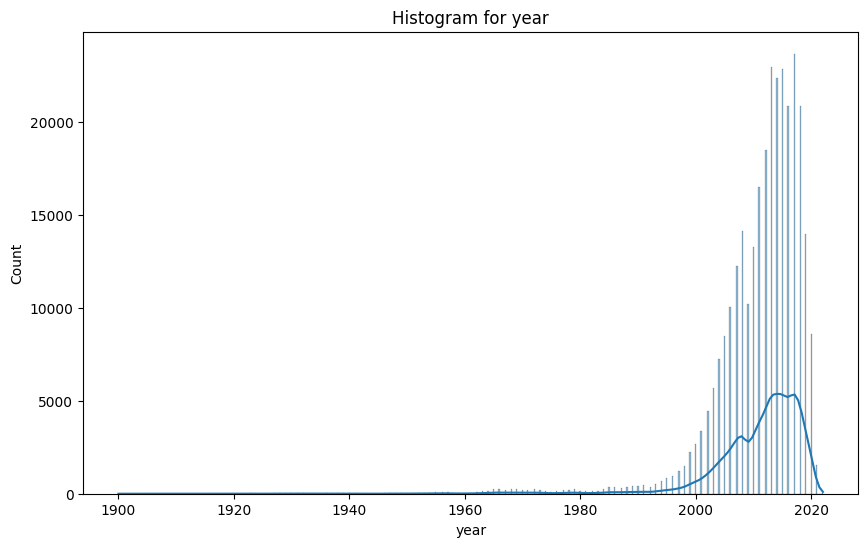

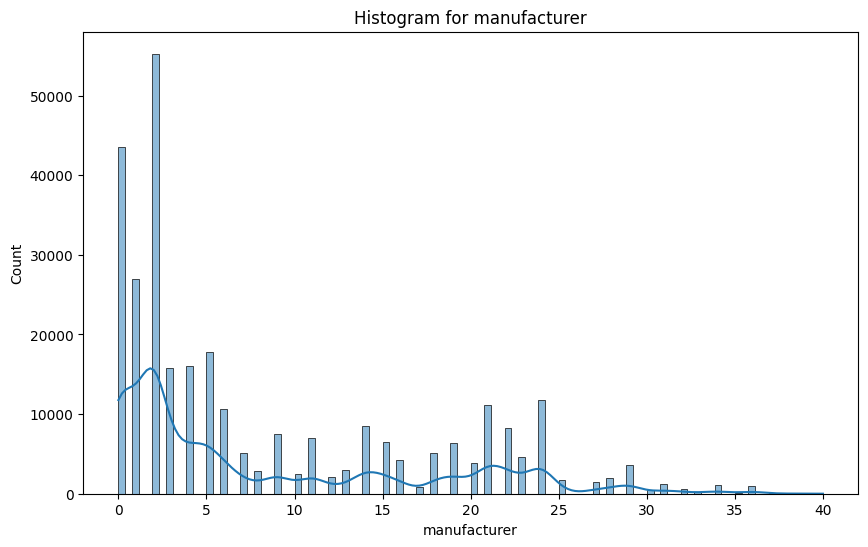

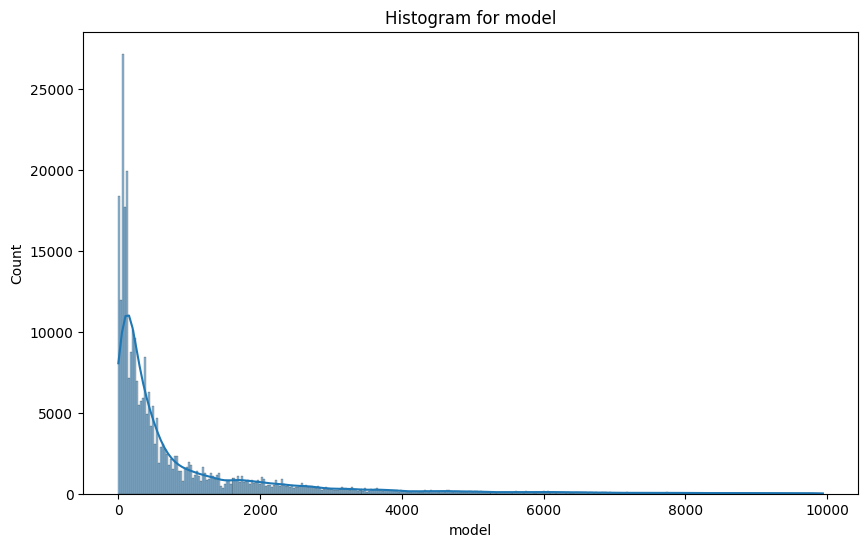

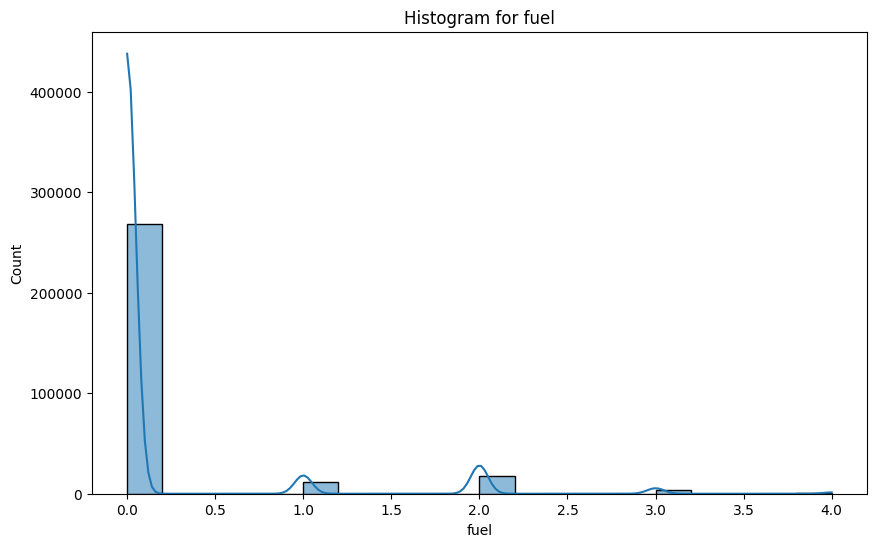

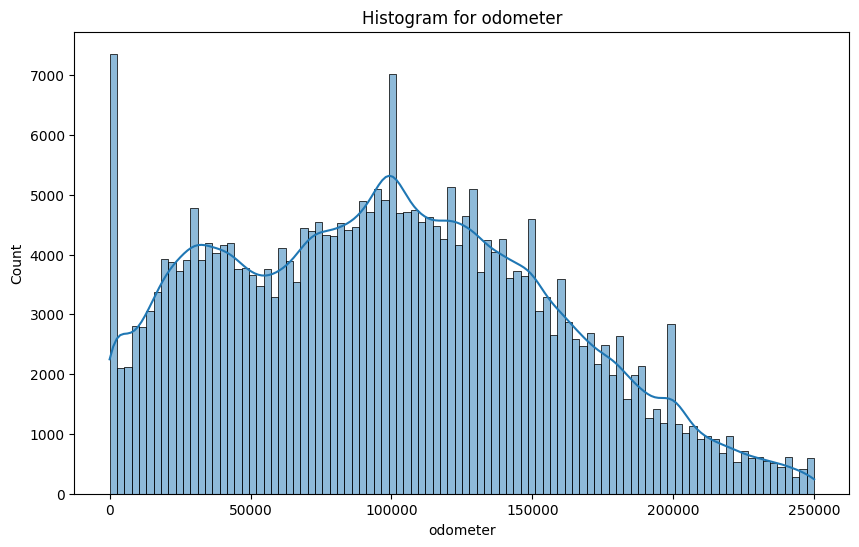

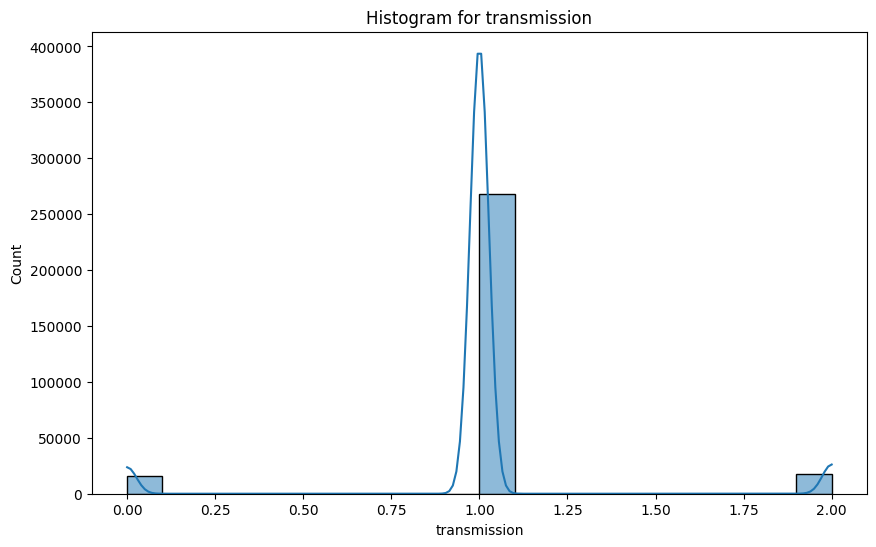

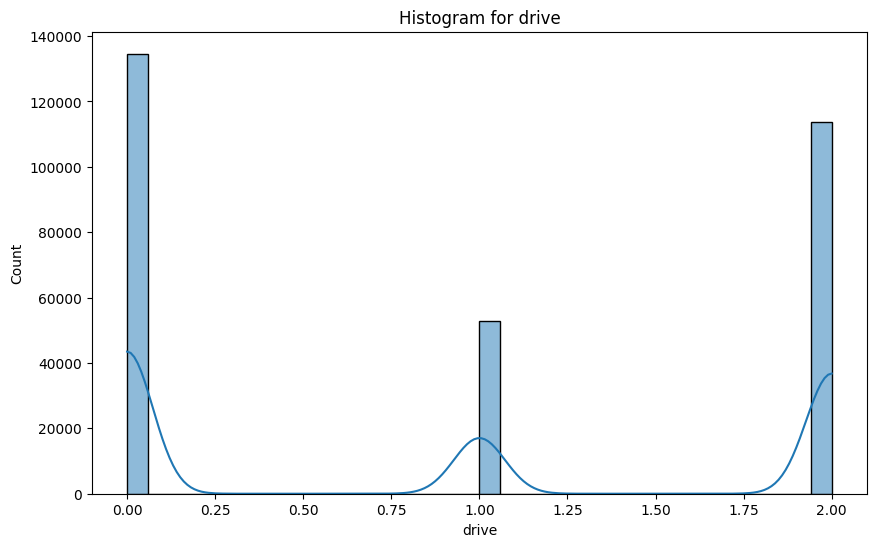

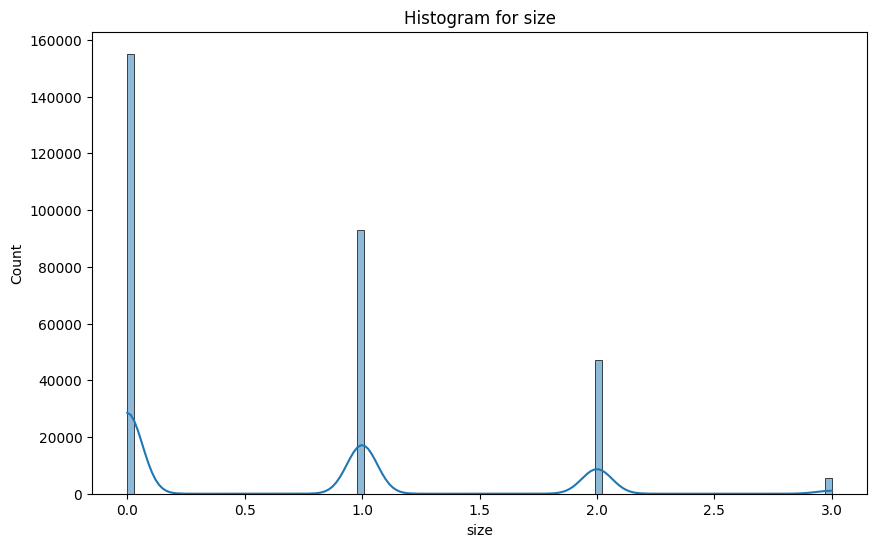

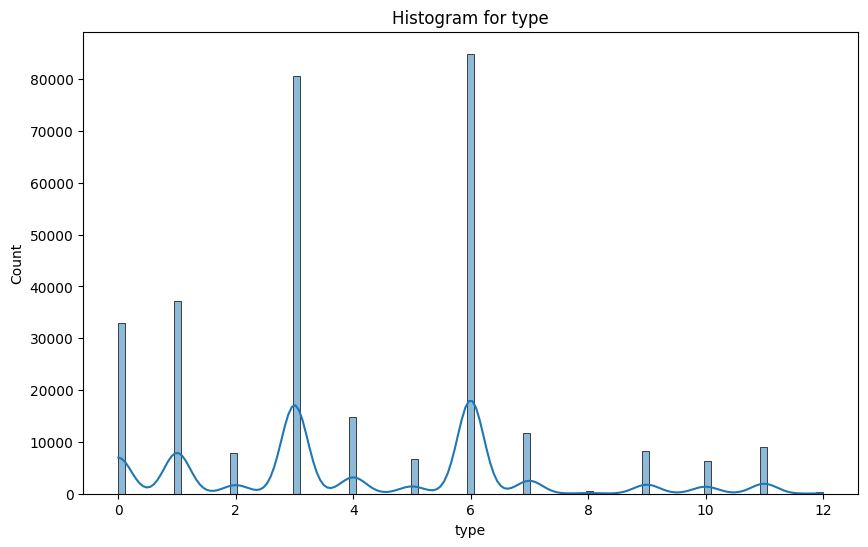

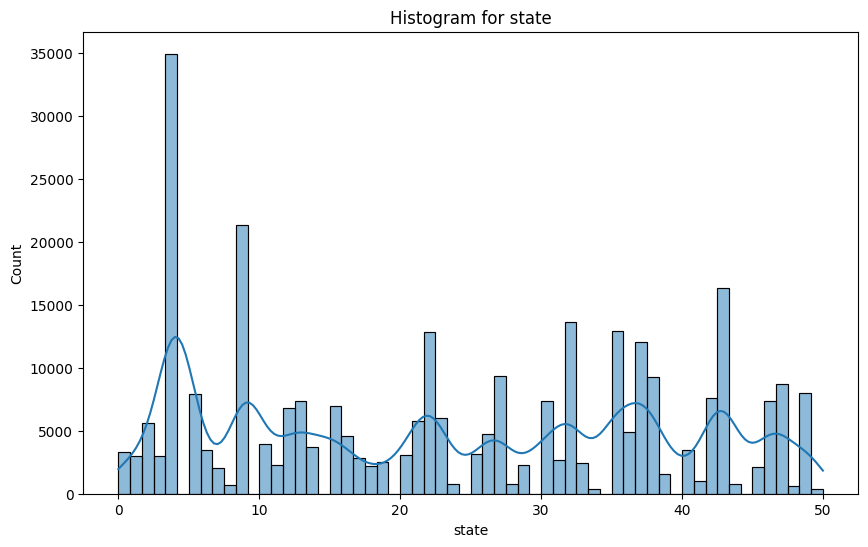

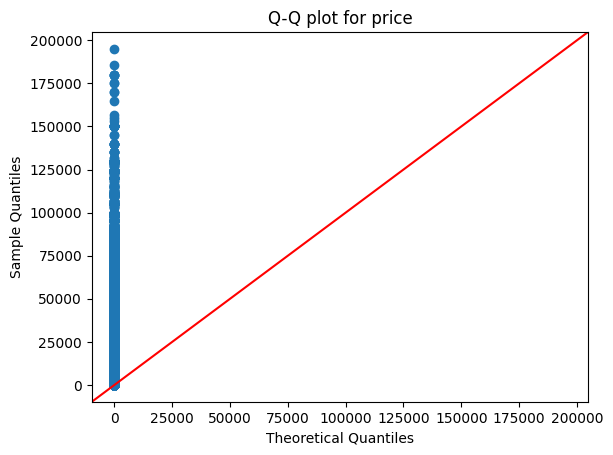

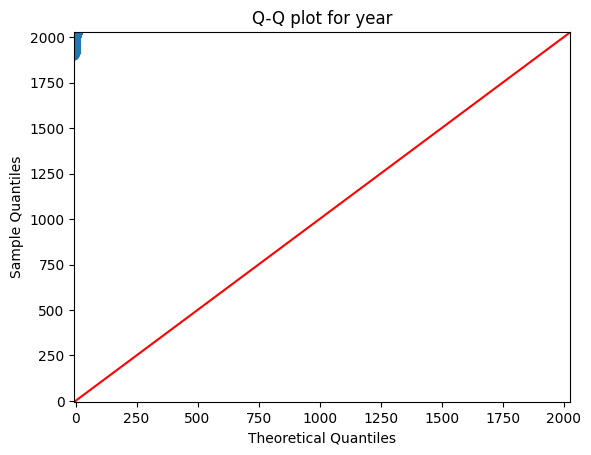

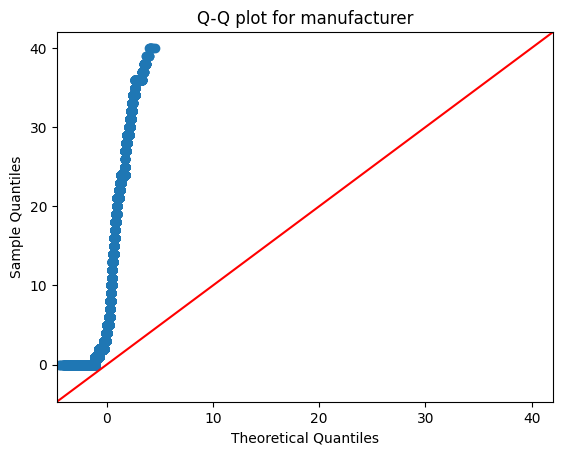

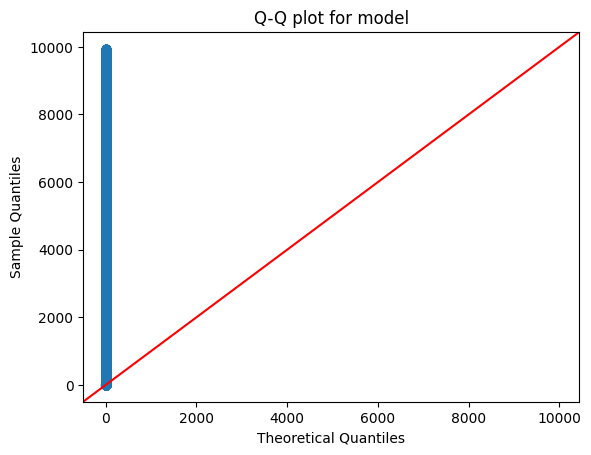

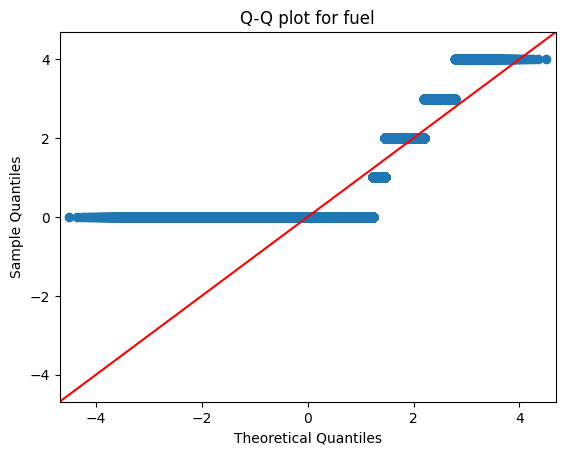

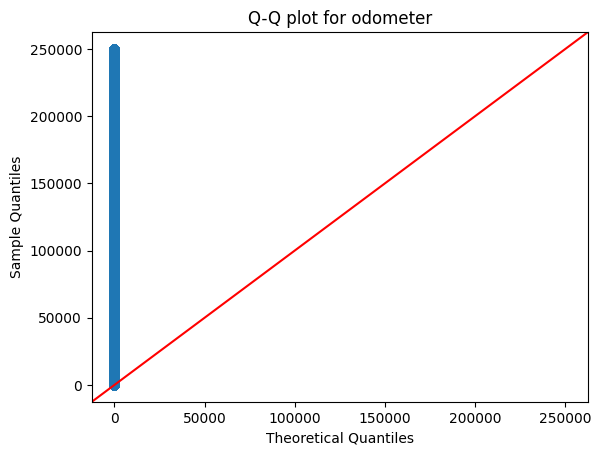

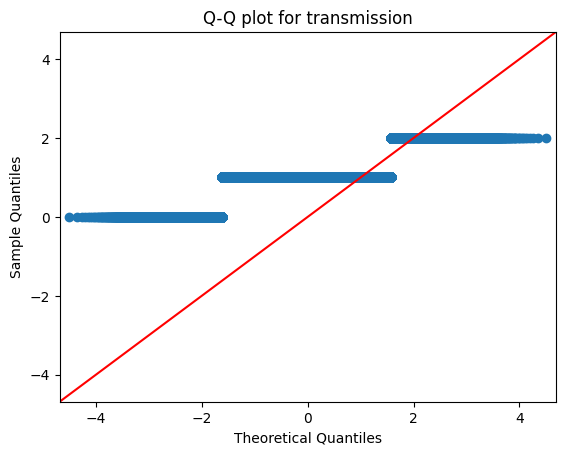

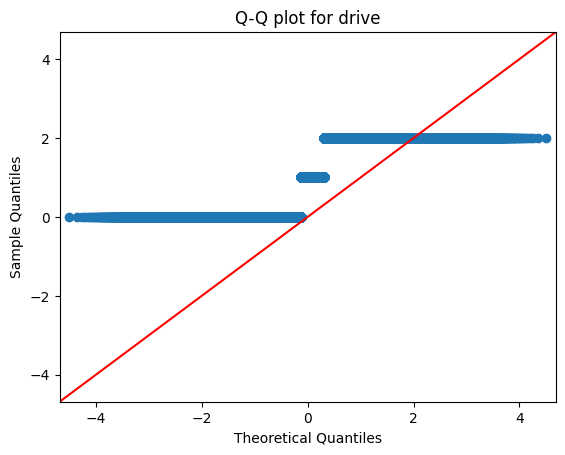

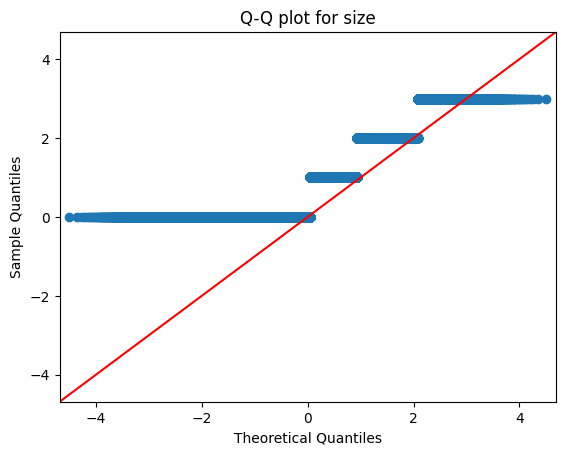

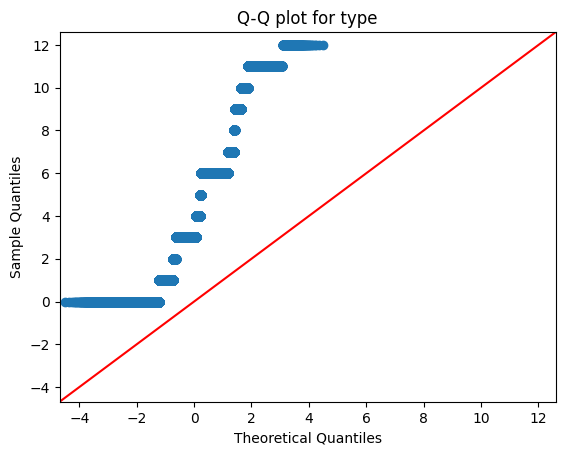

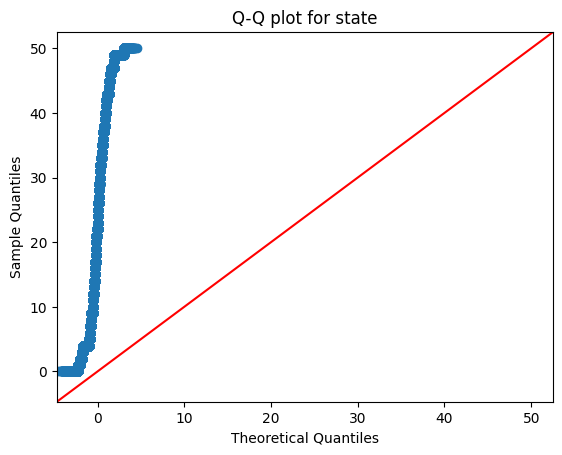

In [24]:
import pandas as pd
from scipy.stats import shapiro, normaltest, anderson
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Prueba de Shapiro-Wilk
for col in df:
    stat, p = shapiro(df[col])
    print(f"Shapiro-Wilk test for {col}: Statistics={stat}, p-value={p}")

# Prueba de D'Agostino y Pearson
for col in df:
    stat, p = normaltest(df[col])
    print(f"D'Agostino and Pearson's test for {col}: Statistics={stat}, p-value={p}")

# Prueba de Anderson-Darling
for col in df:
    result = anderson(df[col])
    print(f"Anderson-Darling test for {col}: Statistics={result.statistic}")
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        print(f'At {sl}% significance level, critical value is {cv}')

# Histogramas
for col in df:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()

# Gráficos Q-Q
for col in df:
    sm.qqplot(df[col], line='45')
    plt.title(f'Q-Q plot for {col}')
    plt.show()
